#### Import Library

In [1]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Regresi Sederhana dengan DNN

#### Buat Data

In [2]:
x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([2,3,4,8,10,12],dtype= float)

#### Buat Sequential Model

In [3]:
model = Sequential()

#### Tambah Layer dan Compile

In [4]:
#Input Layer
model.add(Dense(1,input_shape=[1]))

#Compile Model
model.compile(optimizer='sgd',loss='mse')

#### Latih Model

In [5]:
model.fit(x,y,epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 762ms/step - loss: 47.6023
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 22.5098
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 10.8948
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 5.5177
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 3.0275
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 1.8736
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 1.3381
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 1.0889
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.9722
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9168
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8899
Epoch 12/50
1/1 [==============================] - 0s 17ms/step - loss: 0.8760
Epoch 13/50
1/1 [==============================] - 0s 20ms/st

#### Prediksi Data Baru

In [6]:
new_data = np.array([6.0,7.0,8.0])

y_pred = model.predict(new_data)
print(y_pred)

1/1 [==============================] - 0s 154ms/step
[[11.392719]
 [13.265374]
 [15.138029]]


### Klasifikasi dengan Dataset MNIST

#### Import Library

In [7]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt

#### Load Dataset

In [8]:
(x_train_raw,y_train_raw) , (x_test_raw,y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Encoding label

In [9]:
num_class = 10

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train_raw,num_class)
y_test = keras.utils.to_categorical(y_test_raw,num_class)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Preview Gambar

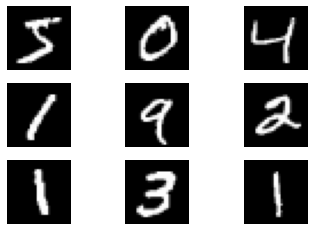

In [11]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i],cmap='gray')
  plt.axis('off')

plt.show()

#### Reshape Gambar

In [12]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

#### Normalisasi

In [13]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#### Buat Model

In [14]:
model_mnist = keras.Sequential()

In [15]:
#Input Layer
model_mnist.add(layers.Dense(512,activation='relu',input_dim=784))

#Hidden Layer
model_mnist.add(layers.Dense(256,activation='relu'))
model_mnist.add(layers.Dense(128,activation='relu'))

#Output Layer
model_mnist.add(layers.Dense(10,activation='softmax'))

**Activation**
- Regresi = relu,tanh
- Klasifikasi - Binary = sigmoid
- Klasifikasi - Multiclass = softmax

In [16]:
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


#### Compile Model

In [17]:
Optimizer = optimizers.Adam(learning_rate=0.0001)

model_mnist.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

**Losses**
- Regresi = mse,mae
- Klasifikasi - Binary = binary_crossentropy
- Klasifikasi - Multiclass = categorical_crossentropy

**Metrics**
- Accuracy
- Recall
- Precision

#### Training Model

In [18]:
history = model_mnist.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 18s 34ms/step - loss: 0.5507 - accuracy: 0.8605 - val_loss: 0.2308 - val_accuracy: 0.9322
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1955 - accuracy: 0.9443 - val_loss: 0.1656 - val_accuracy: 0.9506
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1447 - accuracy: 0.9583 - val_loss: 0.1334 - val_accuracy: 0.9601
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1151 - accuracy: 0.9670 - val_loss: 0.1157 - val_accuracy: 0.9669
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0939 - accuracy: 0.9731 - val_loss: 0.1013 - val_accuracy: 0.9683
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0784 - accuracy: 0.9775 - val_loss: 0.0880 - val_accuracy: 0.9722
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0655 - accuracy: 0.9815 - val_loss: 0.0834 - val_accuracy: 0.974

#### History tiap Epoch

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

History training loss

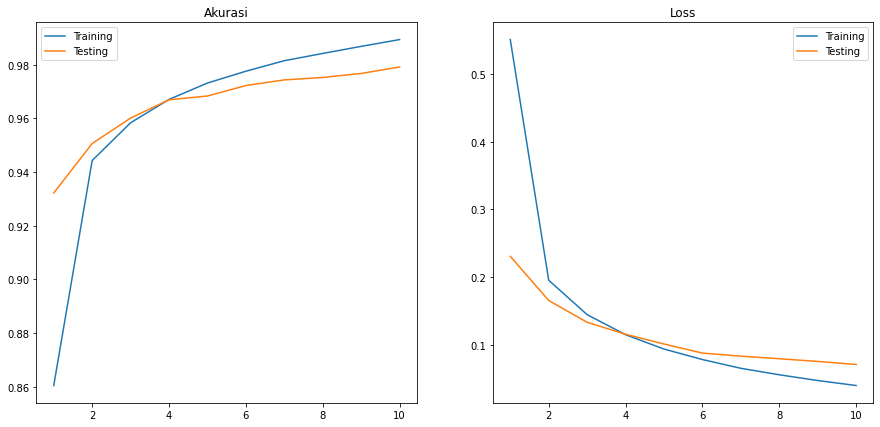

In [20]:
plt.figure(figsize=(15,7))
epoch = [i+1 for i in range(10)]

plt.subplot(1,2,1)
plt.plot(epoch,history.history["accuracy"],label='Training')
plt.plot(epoch,history.history["val_accuracy"],label='Testing')
plt.title("Akurasi")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch,history.history["loss"],label='Training')
plt.plot(epoch,history.history["val_loss"],label='Testing')
plt.title("Loss")
plt.legend()
plt.show()


#### Evaluate Model

In [21]:
score = model_mnist.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 5ms/step - loss: 0.0711 - accuracy: 0.9791
Test Loss    : 0.07113602012395859
Test Akurasi : 97.91 %


#### Save Model

In [22]:
model_mnist.save('Model_mnist.h5')

#### Load Model

In [23]:
modelleeee = tf.keras.models.load_model('Model_mnist.h5')

In [24]:
modelleeee.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


#### Prediksi Model


In [25]:
predictions = model_mnist.predict(x_test)


313/313 [==============================] - 1s 4ms/step


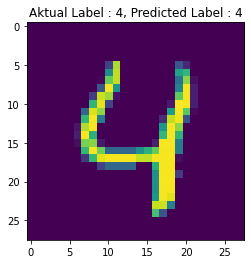

In [26]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[4])



img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()

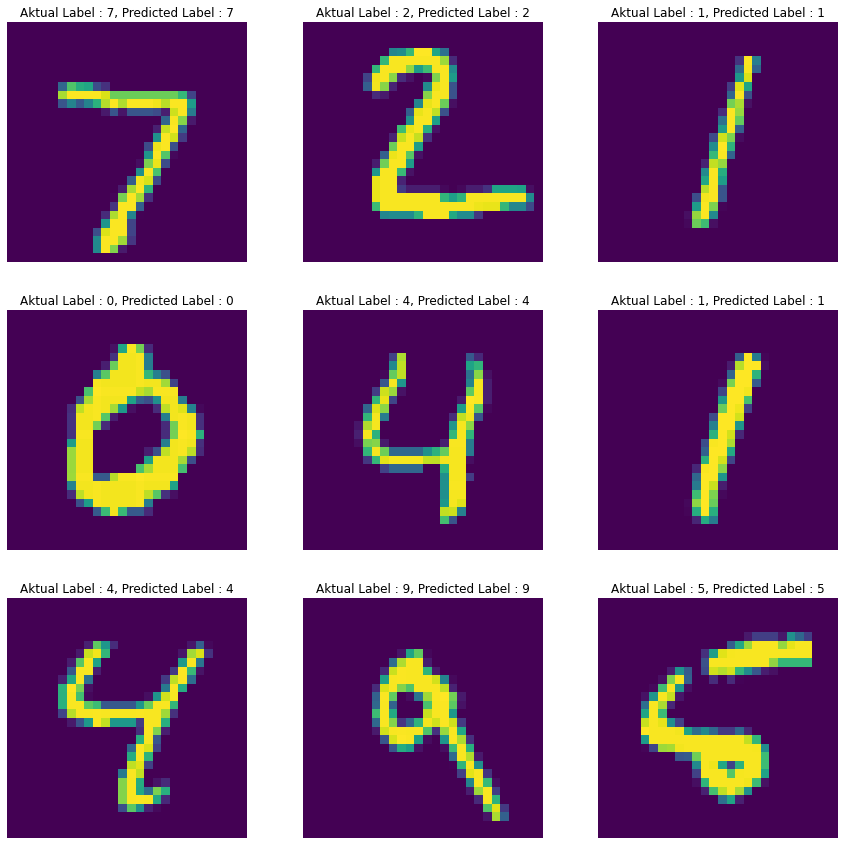

In [27]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)


  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()